In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import math

In [2]:
# Входные параметры 
# Входные параметры 

C = 5 # пиковая пропускная способность соты
mu = 0.5 # среднее время обслуживания запроса на предоставление услуги 1, 2-го типа

# интенсивность поступления запросов на предоставление услуги 1, 2-го типа
l_1 = 1
l_2 = 3

o_1 = 0.3 # среднее время обслуживания запроса на предоставление услуги 1, 2-го типа
o_2 = 0.5



In [3]:
# Функция для вычисления распределения вероятностей
def p_0(l_1,l_2,o_1,o_2,C):
    r_1 = l_1*o_1
    r_2 = l_2*o_2

    a_1=r_1/C
    a_2=r_2/C
    sum_1 = 0
    for i in range(0,C):
        for j in range(0,C):
            sum_1 += (np.math.factorial(i+j)) * ((np.power(a_1,i)/np.math.factorial(i)) * (np.power(a_2,j))/np.math.factorial(j))
    res = 1/sum_1
    return res


[f"p_0 = {p_0(l_1,l_2,o_1,o_2,C)}"]
#0.9933109617167559

['p_0 = 0.6421286338099329']

In [4]:
def p_n12(l_1,l_2,o_1,o_2,C):
    r_1 = l_1*o_1
    r_2 = l_2*o_2
    a_1=r_1/C
    a_2=r_2/C
    sum_1 = 0
    res=[]
    p0 = p_0(l_1,l_2,o_1,o_2,C)
    res.append(p0)
    for i in range(0,C):
        for j in range(0,C):
            if i==0 and j==0:
                continue
            value=(p0 * (np.math.factorial(i+j))) * ((np.power(a_1,i)/np.math.factorial(i)) * ((np.power(a_2,j))/np.math.factorial(j)))
            res.append(value)
    return res

pprint(sum(p_n12(l_1,l_2,o_1,o_2,C)))
pprint(len(p_n12(l_1,l_2,o_1,o_2,C)))

1.0
25


In [5]:
p_n12(l_1,l_2,o_1,o_2,C)

[0.6421286338099329,
 0.19263859014297988,
 0.057791577042893956,
 0.017337473112868186,
 0.005201241933860456,
 0.038527718028595975,
 0.023116630817157584,
 0.010402483867720911,
 0.004160993547088364,
 0.0015603725801581368,
 0.0023116630817157586,
 0.0020804967735441825,
 0.0012482980641265093,
 0.0006241490320632548,
 0.0002808670644284646,
 0.00013869978490294548,
 0.00016643974188353458,
 0.00012482980641265095,
 7.489788384759056e-05,
 3.932138901998504e-05,
 8.321987094176728e-06,
 1.2482980641265094e-05,
 1.1234682577138584e-05,
 7.864277803997008e-06,
 4.718566682398205e-06]

In [6]:
# Вычисление значений блокировки по времени
def avrg_num(l_1,l_2,o_1,o_2,C):
    N_1 = l_1 * (o_1/(o_1*l_1 + o_2*l_2))
    N_2 = l_2 * (o_2/(o_1*l_1 + o_2*l_2))
    return N_1,N_2
print(avrg_num(l_1,l_2,o_1,o_2,C))

(0.16666666666666666, 0.8333333333333334)


In [7]:
# Вычисление значений блокировки по вызовам
def avrg_time(l_1,l_2,o_1,o_2,C):
    N_12=avrg_num(l_1,l_2,o_1,o_2,C)
    if l_1==0:
        T_1=0
    else:
        T_1 = float(N_12[0])/float(l_1)
    if l_2==0:
        T_2=0
    else:
        T_2 = float(N_12[1])/float(l_2)
    return T_1, T_2
print(avrg_time(l_1,l_2,o_1,o_2,C))

(0.16666666666666666, 0.2777777777777778)


Text(0, 0.5, 'Среднее время')

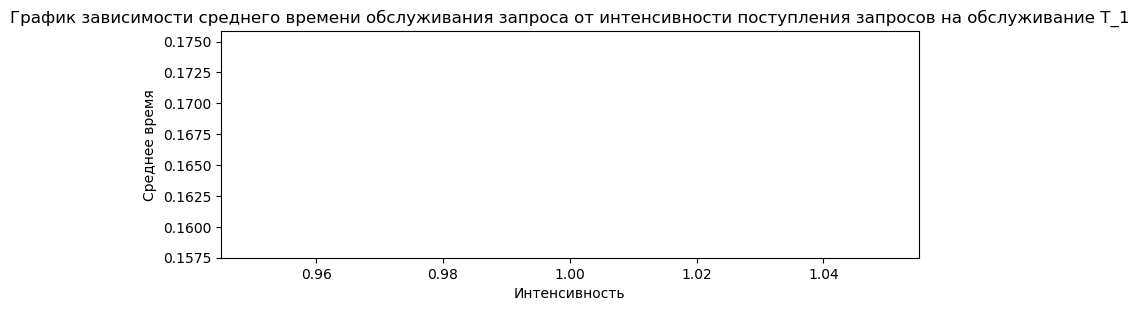

In [8]:
plt.figure(figsize=(9,3),dpi=100)
plist_1=[]
for i in np.linspace(1,l_1,100):
    plist_1.append(avrg_time(i,l_2,o_1,o_2,C)[0])
plt.plot(np.linspace(1,l_1,100),plist_1)
plt.title("График зависимости среднего времени обслуживания запроса от интенсивности поступления запросов на обслуживание T_1")
plt.xlabel("Интенсивность")
plt.ylabel("Среднее время")

Text(0, 0.5, 'Вероятность')

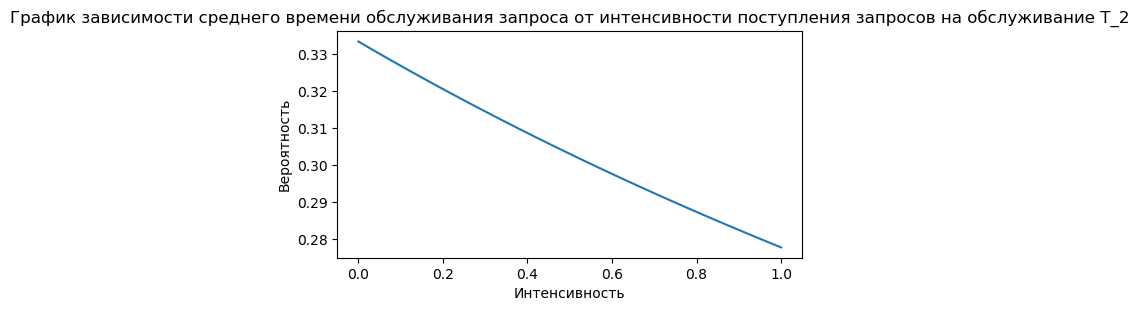

In [9]:
plt.figure(figsize=(6,3),dpi=100)
plist_2=[]
for i in np.linspace(0,l_1,100):
    plist_2.append(avrg_time(i,l_2,o_1,o_2,C)[1])
plt.plot(np.linspace(0,l_1,100),plist_2)
plt.title("График зависимости среднего времени обслуживания запроса от интенсивности поступления запросов на обслуживание T_2")
plt.xlabel("Интенсивность")
plt.ylabel("Вероятность")

Text(0, 0.5, 'Вероятность')

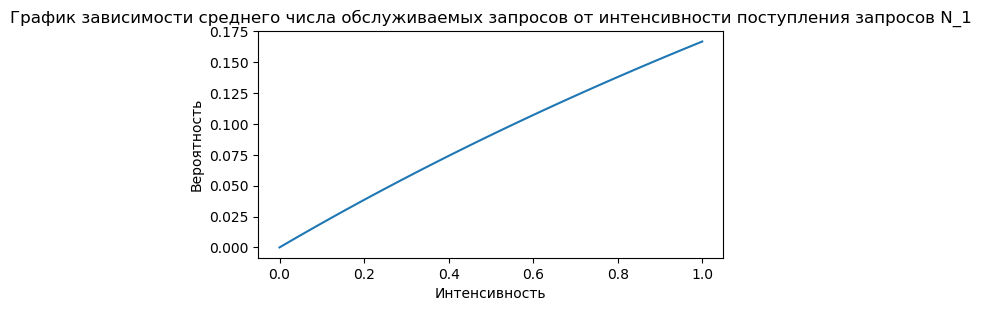

In [10]:
plt.figure(figsize=(6,3),dpi=100)
pN_1=[]
for i in np.linspace(0,l_1,100):
    pN_1.append(avrg_num(i,l_2,o_1,o_2,C)[0])

plt.plot(np.linspace(0,l_1,100),pN_1)
plt.title("График зависимости среднего числа обслуживаемых запросов от интенсивности поступления запросов N_1")
plt.xlabel("Интенсивность")
plt.ylabel("Вероятность")

[0.625, 0.6296758104738156, 0.6342364532019704, 0.6386861313868613, 0.6430288461538461, 0.6472684085510689, 0.6514084507042253, 0.6554524361948956, 0.6594036697247707, 0.663265306122449, 0.6670403587443946, 0.6707317073170731, 0.6743421052631579, 0.6778741865509761, 0.6813304721030042, 0.6847133757961783, 0.6880252100840337, 0.6912681912681912, 0.6944444444444444, 0.6975560081466397, 0.7006048387096774, 0.7035928143712574, 0.7065217391304348, 0.7093933463796478, 0.7122093023255813, 0.7149712092130519, 0.717680608365019, 0.7203389830508474, 0.7229477611940299, 0.7255083179297598, 0.728021978021978, 0.7304900181488203, 0.7329136690647482, 0.7352941176470589, 0.7376325088339223, 0.7399299474605954, 0.7421875, 0.7444061962134251, 0.7465870307167235, 0.7487309644670052, 0.7508389261744967, 0.7529118136439268, 0.754950495049505, 0.7569558101472995, 0.7589285714285714, 0.7608695652173914, 0.7627795527156549, 0.7646592709984152, 0.7665094339622641, 0.7683307332293292, 0.7701238390092879, 0.771

Text(0, 0.5, 'Вероятность')

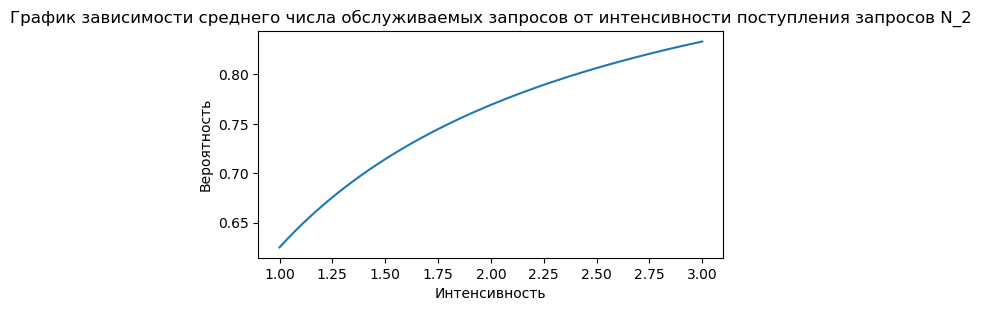

In [11]:
plt.figure(figsize=(6,3),dpi=100)
pN_2=[]
for i in np.linspace(1,l_2,100):
    pN_2.append(avrg_num(l_1,i,o_1,o_2,C)[1])
print(pN_2)
plt.plot(np.linspace(1,l_2,100),pN_2)
plt.title("График зависимости среднего числа обслуживаемых запросов от интенсивности поступления запросов N_2")
plt.xlabel("Интенсивность")
plt.ylabel("Вероятность")